In [6]:
import numpy as nu
import scanpy as sc
import pandas as pd
from scipy.sparse import csr_matrix

from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline

import numpy.core.multiarray
from matplotlib.patches import Patch
import os
from collections import Counter
import scvi

In [18]:
adata_filtered = sc.read("/home/jovyan/ifbdata/spatial_cell_id/Kush/Scanpy_analysis/New_analysis/adata_filtered_scvi.h5ad")

In [19]:
sc.pp.scrublet(adata_filtered, batch_key="Dataset")

In [20]:
adata_filtered.obs['predicted_doublet']

GAACACTTCATTGCGA      False
TCTCACGTCCGCACTT       True
CTCCAACTCTCCTACG      False
AGATGAAAGACTCGAG      False
GCTACCTAGCAATAAC      False
                      ...  
AACCAGGAGATAGGAG      False
AAGGCATAGGGCATGT      False
AGGGAAGCAGCATACT      False
CAGCCGAGTTCCCTTG-1    False
ACTCTAATCGGTTAAC      False
Name: predicted_doublet, Length: 693294, dtype: bool

In [24]:
d = [i for i in adata_filtered.obs['predicted_doublet'].values]
count = 0
for item in d:
    if item == True:
        count+=1
print(count)

3911


In [25]:
# Now to remove the cells which are predicted as a doublet (3911 cells):
adata_filtered = adata_filtered[adata_filtered.obs['predicted_doublet'] != True]
# 693294 - 3911 = 689383 cells 

In [30]:
# all false now
print(sum(adata_filtered.obs["predicted_doublet"] == False))

689383


In [31]:
# adata_filtered.write("/home/jovyan/ifbdata/spatial_cell_id/Kush/Scanpy_analysis/New_analysis/adata_doublet_removed_scvi.h5ad")

/opt/conda/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/conda/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/conda/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/conda/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/conda/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/conda/lib/python3.12/site-packages/anndata/_core/anndata.py:1146:

In [161]:
adata_filtered = sc.read("/home/jovyan/ifbdata/spatial_cell_id/Kush/Scanpy_analysis/New_analysis/adata_doublet_removed_scvi.h5ad", cache=True)

In [162]:
adata_filtered.layers["counts"] = adata_filtered.X.copy()  # preserve counts

In [163]:
sc.pp.normalize_total(adata_filtered, target_sum=1e4)
sc.pp.log1p(adata_filtered)

adata_filtered.raw = adata_filtered  # freeze the state in `.raw`

In [167]:
sc.pp.highly_variable_genes(
    adata_filtered,
    n_top_genes=10000,
    subset=True,
    #layer="counts",
    batch_key="Publication",
    # n_batches = 3
)

In [168]:
adata_filtered

AnnData object with n_obs × n_vars = 689383 × 10000
    obs: 'Dataset', 'Age', 'Sex', 'Skin area', 'Ethnicity', 'Publication', 'n_genes_by_counts', 'total_counts', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Publication_colors', 'scrublet', 'log1p', 'hvg'
    layers: 'counts'

In [169]:
scvi.model.SCVI.setup_anndata(
    adata_filtered,
    layer="counts",
    batch_key="Publication",
    categorical_covariate_keys=["Publication"],
    continuous_covariate_keys=['pct_counts_mt', 'pct_counts_ribo'],
)

In [170]:
print(adata_filtered.layers["counts"])

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 312451826 stored elements and shape (689383, 10000)>
  Coords	Values
  (0, 3)	2.0
  (0, 7)	2.0
  (0, 13)	1.0
  (0, 17)	1.0
  (0, 18)	3.0
  (0, 32)	3.0
  (0, 36)	2.0
  (0, 39)	8.0
  (0, 58)	3.0
  (0, 62)	5.0
  (0, 69)	2.0
  (0, 77)	1.0
  (0, 88)	3.0
  (0, 92)	1.0
  (0, 111)	1.0
  (0, 118)	1.0
  (0, 136)	1.0
  (0, 144)	0.5
  (0, 148)	16.0
  (0, 153)	1.0
  (0, 156)	6.0
  (0, 157)	1.0
  (0, 161)	15.0
  (0, 177)	1.0
  (0, 179)	2.0
  :	:
  (689382, 7142)	1.0
  (689382, 7253)	1.0
  (689382, 7255)	2.0
  (689382, 7261)	1.0
  (689382, 7386)	1.0
  (689382, 7476)	0.25
  (689382, 7540)	1.0
  (689382, 7569)	1.0
  (689382, 8229)	1.0
  (689382, 8344)	1.0
  (689382, 8378)	2.0
  (689382, 8423)	1.0
  (689382, 8510)	1.0
  (689382, 8719)	1.0
  (689382, 8911)	1.0
  (689382, 9103)	1.3333333730697632
  (689382, 9126)	0.5
  (689382, 9429)	1.0
  (689382, 9437)	1.0
  (689382, 9572)	1.0
  (689382, 9605)	2.0
  (689382, 9783)	1.0
  (689382, 9821)	1.0
  (

In [171]:
model = scvi.model.SCVI(adata_filtered)

In [172]:
model

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [173]:
scvi.settings.dl_kwargs = {"num_workers": 8} # Use more core
model.train() # Forza CPU

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.


Training:   0%|          | 0/12 [00:00<?, ?it/s]

/opt/conda/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/opt/conda/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/opt/conda/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/opt/conda/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/opt/conda/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

In [174]:
adata_filtered.layers["counts"] 

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 312451826 stored elements and shape (689383, 10000)>

In [175]:
adata_filtered.obs['predicted_doublet']

GAACACTTCATTGCGA      False
CTCCAACTCTCCTACG      False
AGATGAAAGACTCGAG      False
GCTACCTAGCAATAAC      False
CTCTCGAAGAACCGCA      False
                      ...  
AACCAGGAGATAGGAG      False
AAGGCATAGGGCATGT      False
AGGGAAGCAGCATACT      False
CAGCCGAGTTCCCTTG-1    False
ACTCTAATCGGTTAAC      False
Name: predicted_doublet, Length: 689383, dtype: bool

In [176]:
adata_filtered.obs["summary"] = adata_filtered.layers['counts'].sum(axis=1)  # Sum of counts per cell
print(adata_filtered.obs["summary"].describe())  # Check if values are around 10,000

count    689383.000000
mean       1281.770020
std        1253.637207
min          27.333349
25%         466.000000
50%         916.916626
75%        1708.144836
max       48734.125000
Name: summary, dtype: float64


In [177]:
latent = model.get_latent_representation()

In [178]:
adata_filtered.obsm["X_scVI"] = latent

In [179]:
adata_filtered.layers["scvi_normalized"] = model.get_normalized_expression(library_size=10e4)

In [180]:
adata_filtered.write("/home/jovyan/ifbdata/spatial_cell_id/Kush/Scanpy_analysis/New_analysis/adata_scvi_trained.h5ad")

In [181]:
adata_filtered.obsm["X_scVI"]

array([[-2.1531107 , -1.4420515 ,  1.279448  , ...,  0.10982236,
         1.0507569 , -1.5559466 ],
       [-0.945164  ,  0.01009679, -0.888667  , ...,  0.5998737 ,
        -0.4830768 , -0.2757286 ],
       [ 0.04307538,  0.28196502, -0.22584105, ...,  0.3774026 ,
        -1.2749522 ,  0.13824713],
       ...,
       [-1.440733  ,  0.9033861 , -1.1634425 , ..., -1.2025592 ,
        -0.34318244,  1.7961612 ],
       [-0.10699219, -0.45086616, -0.17245495, ..., -0.50905037,
         0.49379724,  0.6504619 ],
       [ 0.49909145,  0.23231423, -0.50036013, ..., -1.4650496 ,
         0.37433004,  0.27474374]], dtype=float32)

In [182]:
# sc.tl.pca(adata_filtered.layers['scvi_normalized'], random_state = 7)

sc.tl.pca(adata_filtered, random_state = 7) #PCA is calculated on the raw data

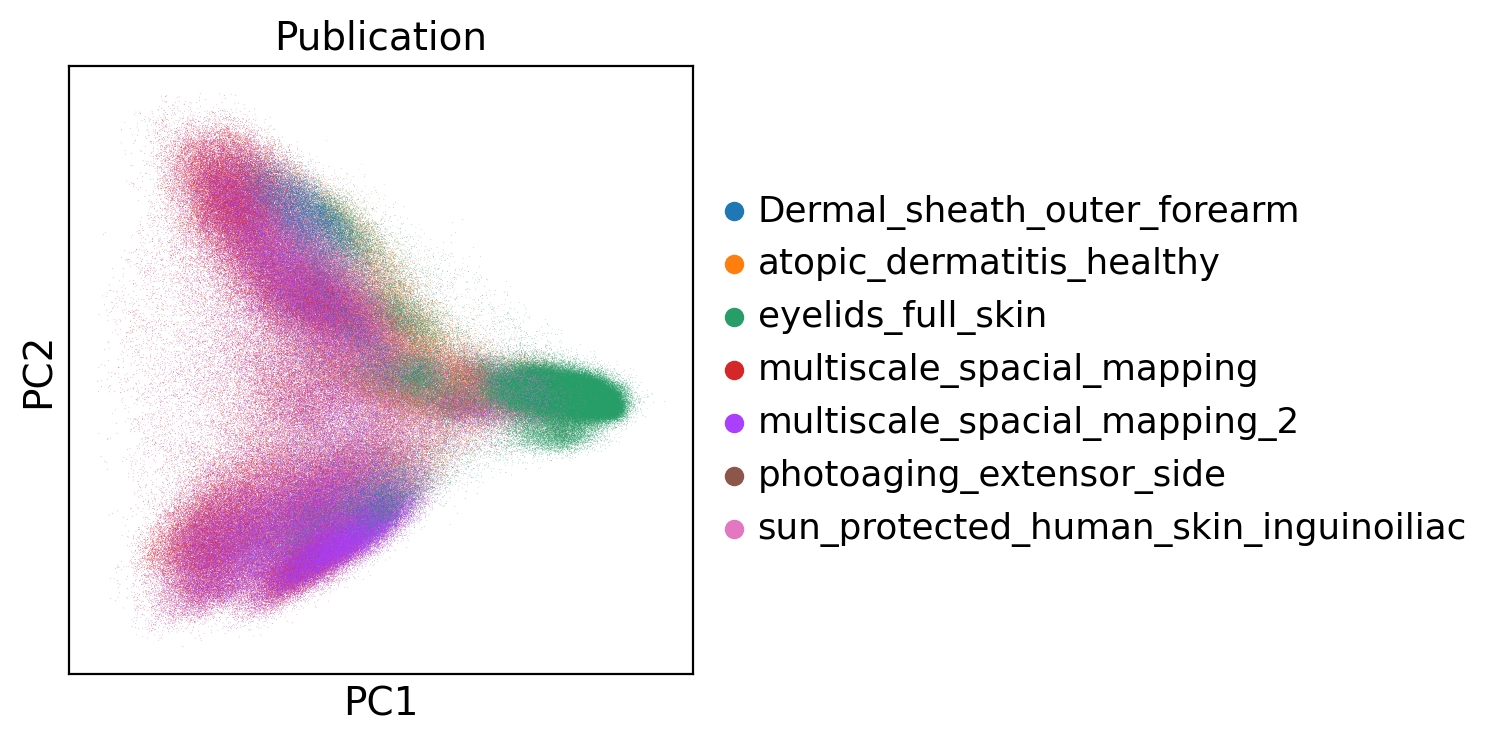

In [199]:
sc.settings.set_figure_params(dpi = 100, facecolor='white')
sc.pl.pca(adata_filtered, color='Publication')
# plt.savefig("/home/jovyan/ifbdata/spatial_cell_id/Kush/Scanpy_analysis/New_analysis/PCA.png", dpi=300, bbox_inches="tight")
# plt.close()

In [184]:
sc.pp.neighbors(adata_filtered, n_pcs=30, n_neighbors=20, random_state = 7)

In [185]:
sc.tl.umap(adata_filtered, min_dist=0.3, random_state = 7)

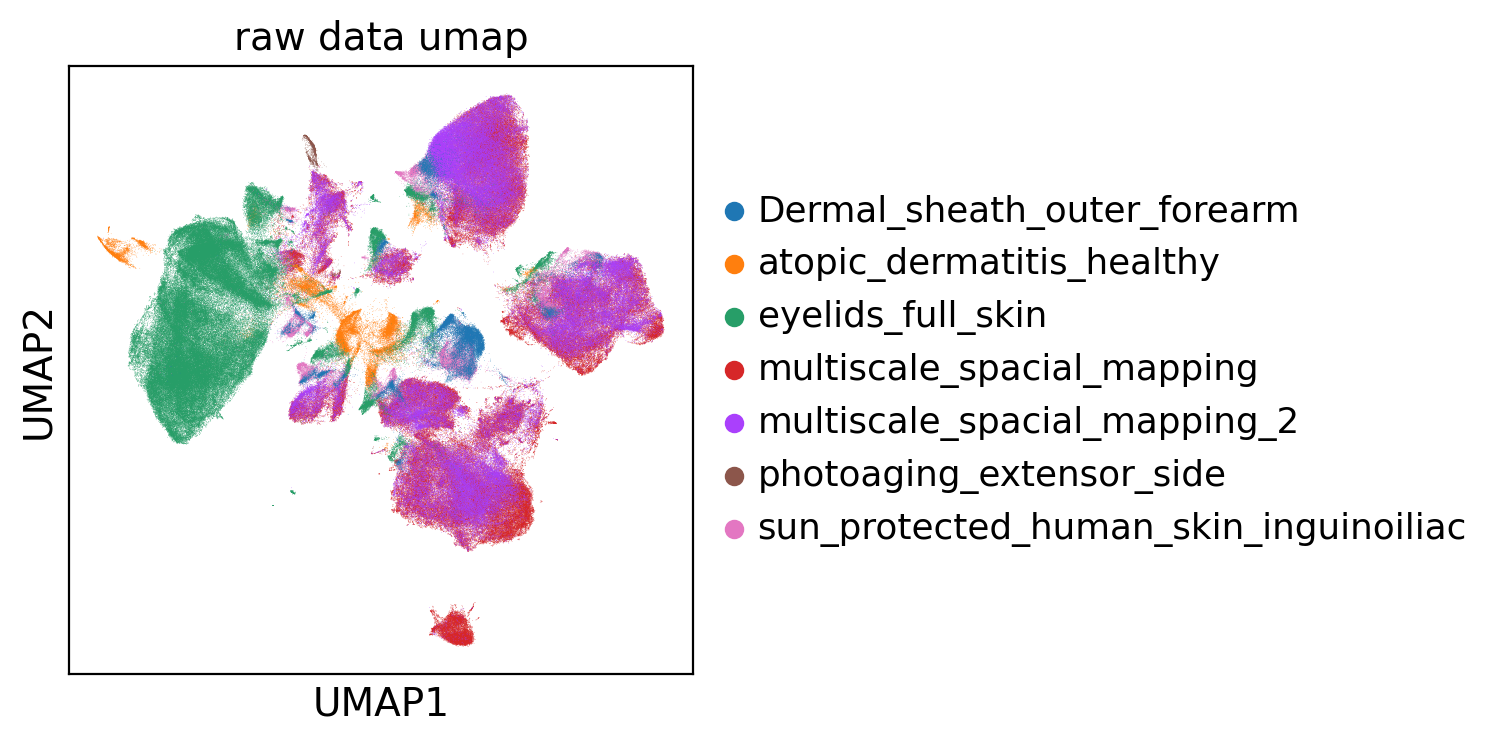

In [186]:
sc.pl.umap(adata_filtered, color='Publication', title = "raw data umap")

In [188]:
# using the scvi latent space for neighbors (required for umap generation further)
sc.pp.neighbors(adata_filtered, use_rep="X_scVI", random_state = 7)

In [189]:
sc.tl.umap(adata_filtered, min_dist=0.3, random_state = 7)

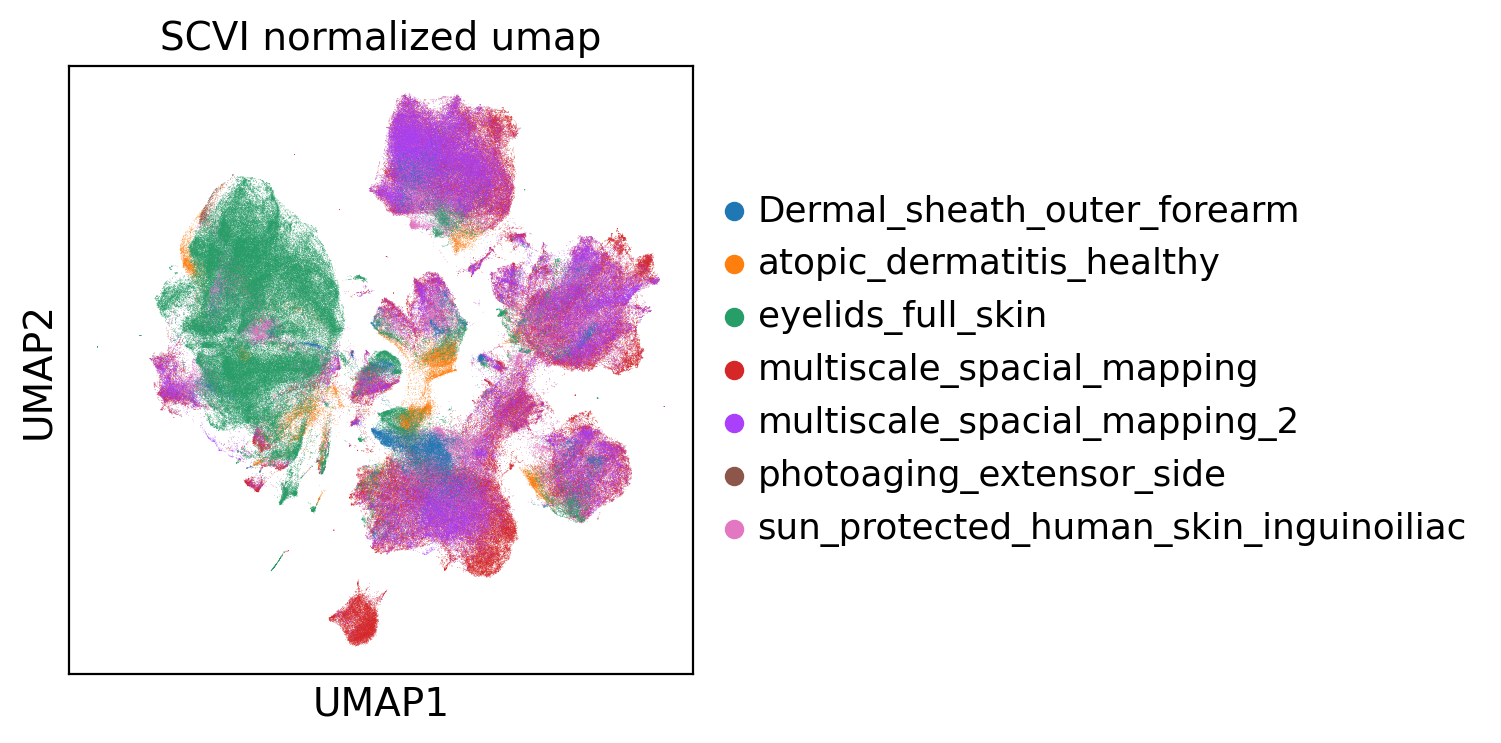

In [193]:
sc.pl.umap(adata_filtered, color='Publication', title = "SCVI normalized umap") #batch key = publication
# plt.savefig("/home/jovyan/ifbdata/spatial_cell_id/Kush/Scanpy_analysis/New_analysis/SCVI_normalized_umap.png", dpi=300, bbox_inches="tight")
# plt.close()

Now, plotting the required umaps:

Dispersion of cells from different publications on the umap, being mixed show they are batch corrected and normalized correcttly

In [196]:
publications = ['Dermal_sheath_outer_forearm', 'atopic_dermatitis_healthy', 'eyelids_full_skin', 'multiscale_spacial_mapping', 
                'multiscale_spacial_mapping_2', 'photoaging_extensor_side', 'sun_protected_human_skin_inguinoiliac']
for publication in publications:
    sc.pl.umap(adata_filtered, color = "Publication", groups = publication, title = f"{publication} - SCVI", show=False)
    plt.savefig(f"/home/jovyan/ifbdata/spatial_cell_id/Kush/Scanpy_analysis/New_analysis/SCVI_publication/{publication}.png", dpi=300, bbox_inches="tight")
    plt.close()

plotting gene expression of each gene from the given marker genes for each cell type

In [215]:
cell_type_genes = {
    # "Basal Keratinocytes": ["KRT14", "COL17A1", "IGFBP3", "COL7A1"],
    # "Spinous Cells": ["LOR", "KRT10", "KRT1"],
    # "Granular Cells": ["FLG"],
    # "Mitotic Cells": ["TK1", "MKI67"],
    # "Hair Follicle Cells": ["SOX9", "KRT6B", "SFRP1"],
    # "Melanocytes": ["TYR", "DCT"],
    # "Immune Cells": ["PTPRC"],
    # "Endothelial Cells": ["CLDN5", "CDH5"],
    # "Pericytes": ["PDGFRB", "CSPG4", "RGS5"],
    # "Fibroblasts": ["COL1A1", "COL1A2", "PDGFRA", "DCN"],
    # "Papillary Fibroblasts": ["PDPN", "MMP1", "LOXL3", "DCN", "APCDD1"],
    # "Reticular Fibroblasts": ["COL11A1", "ACAN", "TGM2", "MGP", "ELN", "FGF7"],
    # "Fibroblast Activation": ["HES1", "IER2", "ID3", "TSC22D1", "GADD45B", "ID1", "ZFP36"],
    "Keratinocytes": ["KLF6"]
}
for cell_type, gene_list in cell_type_genes.items():
    for gene in gene_list:
        # print(gene)
        sc.settings.set_figure_params(dpi=100, facecolor='white')
        filepath = f"/home/jovyan/ifbdata/spatial_cell_id/Kush/Scanpy_analysis/New_analysis/marker_gene_expression/{cell_type}/"
        os.makedirs(filepath, exist_ok=True)
        sc.pl.umap(adata_filtered, color=gene, title=gene, vmax = 0.5, show=False)
        plt.savefig(os.path.join(filepath, f"{gene}.png"), dpi=300, bbox_inches="tight")
        plt.close()

plotting gene expression for cell type using marker gene expression combined score for each cell type

In [230]:
cell_type_genes = {
    # "Basal Keratinocytes": ["KRT14", "COL17A1", "IGFBP3", "COL7A1"],
    # "Spinous Cells": ["LOR", "KRT10", "KRT1"],
    # "Granular Cells": ["FLG"],
    # "Mitotic Cells": ["TK1", "MKI67"],
    # "Hair Follicle Cells": ["SOX9", "KRT6B", "SFRP1"],
    # "Melanocytes": ["TYR", "DCT"],
    # "Immune Cells": ["PTPRC"],
    # "Endothelial Cells": ["CLDN5", "CDH5"],
    # "Pericytes": ["PDGFRB", "CSPG4", "RGS5"],
    # "Fibroblasts": ["COL1A1", "COL1A2", "PDGFRA", "DCN"],
    # "Papillary Fibroblasts": ["PDPN", "MMP1", "LOXL3", "DCN", "APCDD1"],
    # "Reticular Fibroblasts": ["COL11A1", "ACAN", "TGM2", "MGP", "ELN", "FGF7"],
    # "Fibroblast Activation": ["HES1", "IER2", "ID3", "TSC22D1", "GADD45B", "ID1", "ZFP36"],
    "Keratinocytes": ["KLF6"]
}
for cell_type, gene_list in cell_type_genes.items():    
    sc.tl.score_genes(adata_filtered, gene_list=gene_list, score_name="cell_type_score", random_state=7)
    sc.settings.set_figure_params(dpi=100, facecolor='white')
    filepath = "/home/jovyan/ifbdata/spatial_cell_id/Kush/Scanpy_analysis/New_analysis/cell_type_expression/"
    sc.pl.umap(adata_filtered, color="cell_type_score", title=f"{cell_type}", vmax = 0.5, show=False)
    plt.savefig(os.path.join(filepath, f"{cell_type.replace(' ', '_')}.png"), dpi=300, bbox_inches="tight")
    plt.close()

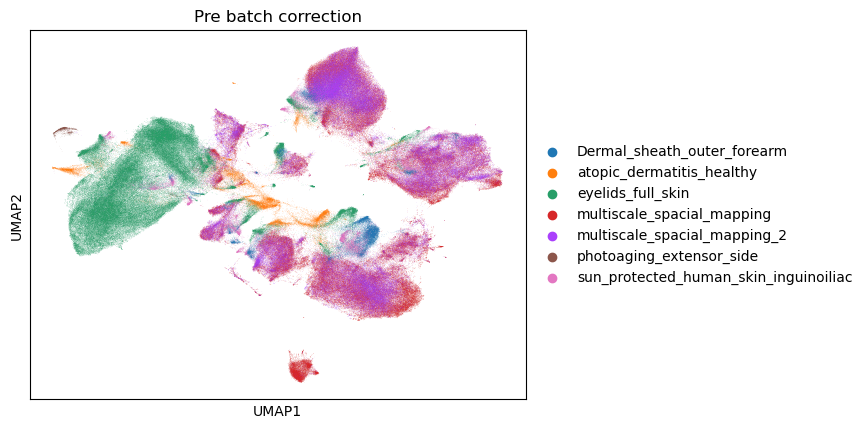

In [56]:
# just for reference
# for categorical covairate key as 'Dataset' umap space

# sc.pl.umap(adata_filtered, color='Publication', title = "Pre batch correction")

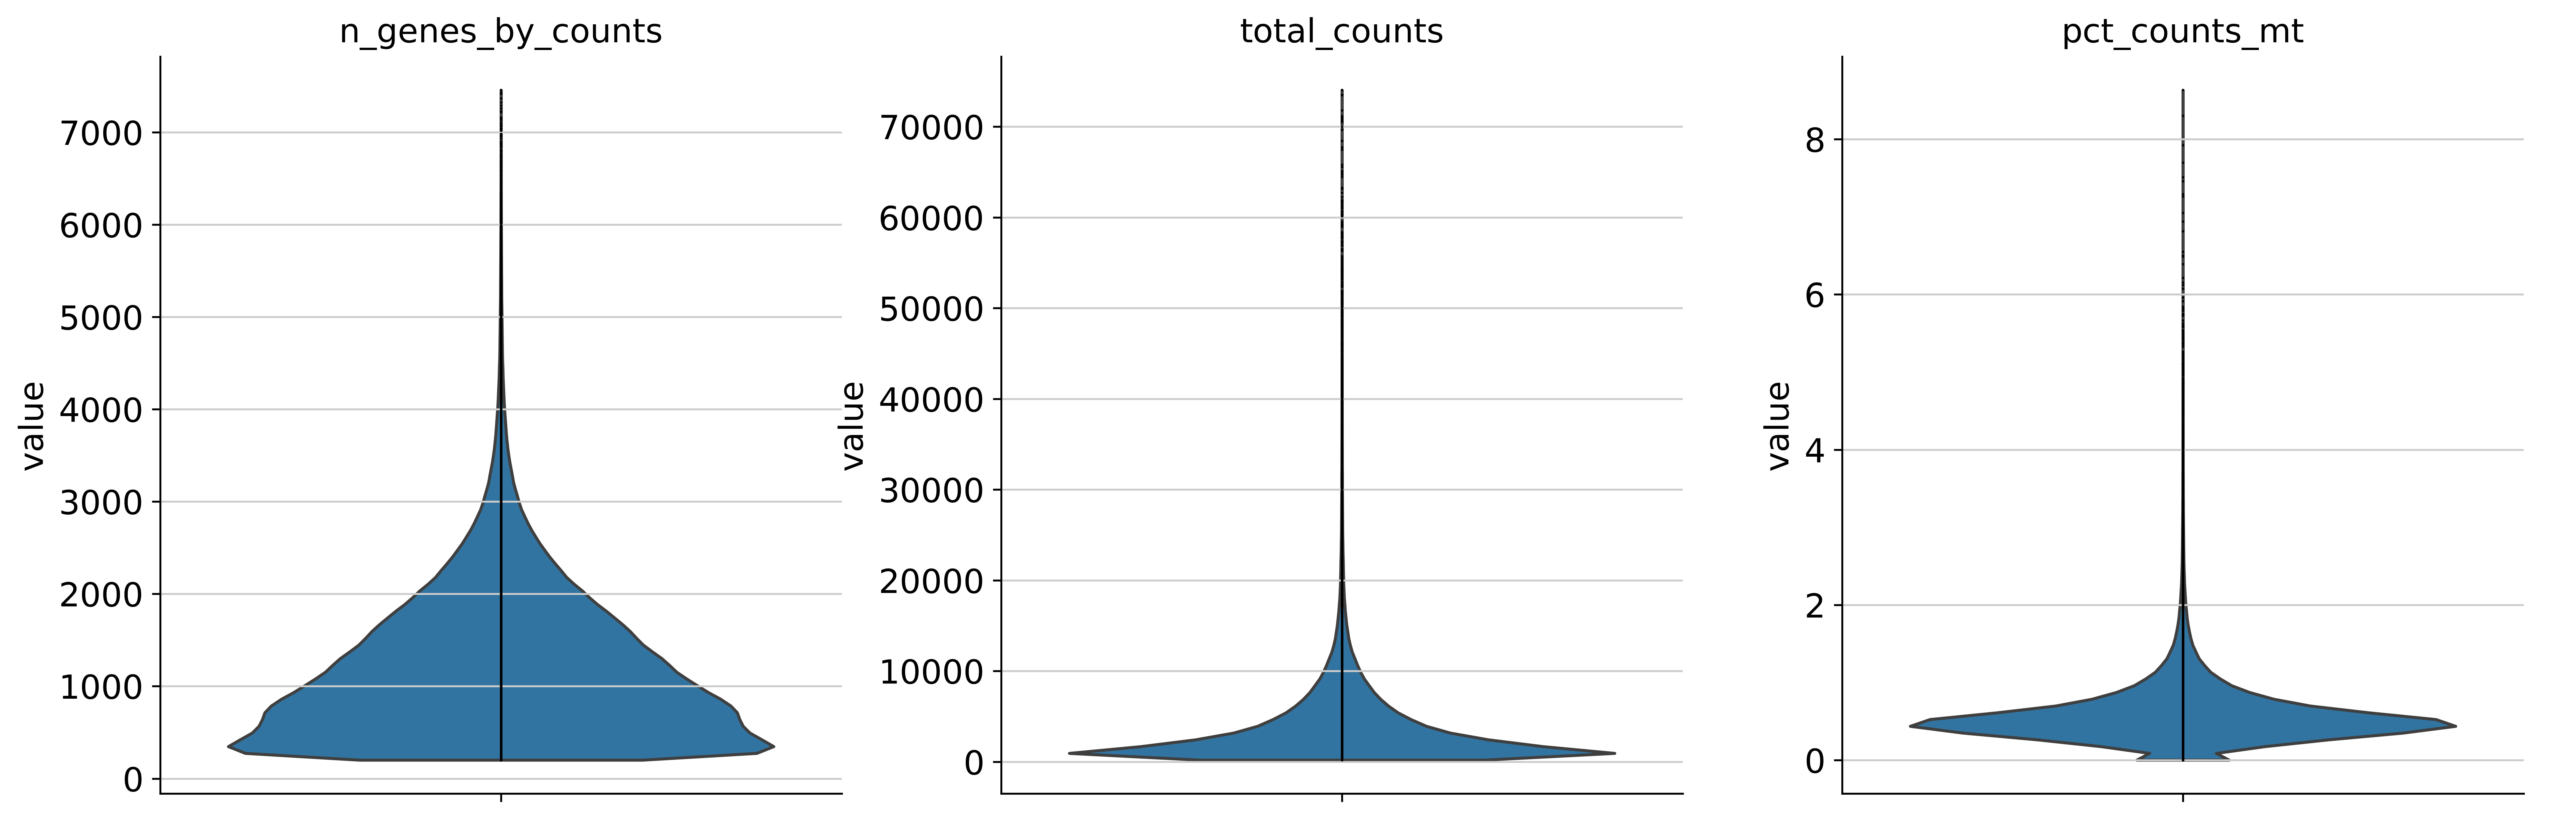

In [231]:
sc.settings.set_figure_params(dpi = 300, facecolor='white')
sc.pl.violin(adata_filtered, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0, multi_panel=True) #need to adjust jitter for non-cluttered plots.

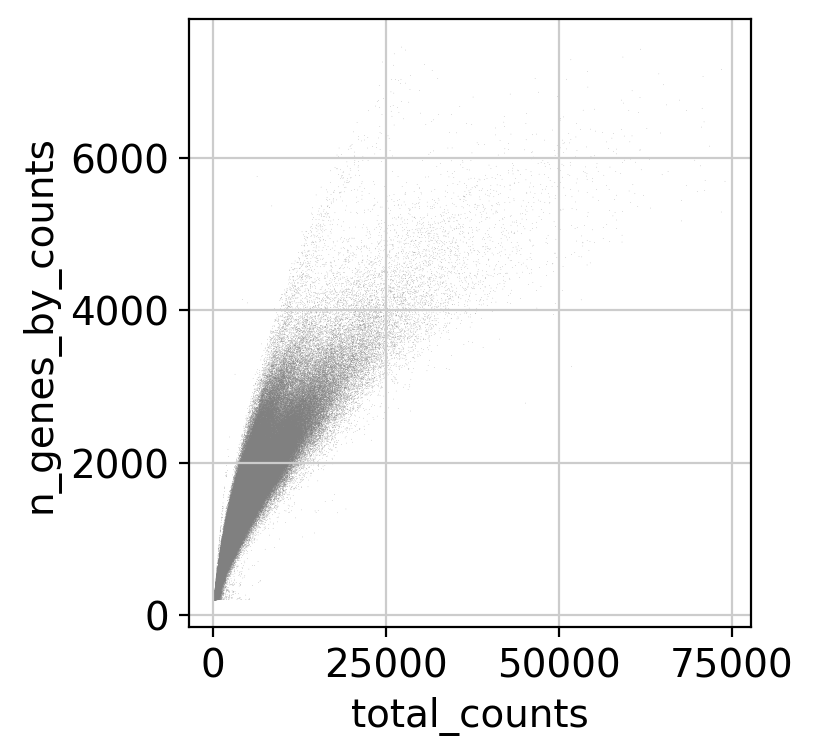

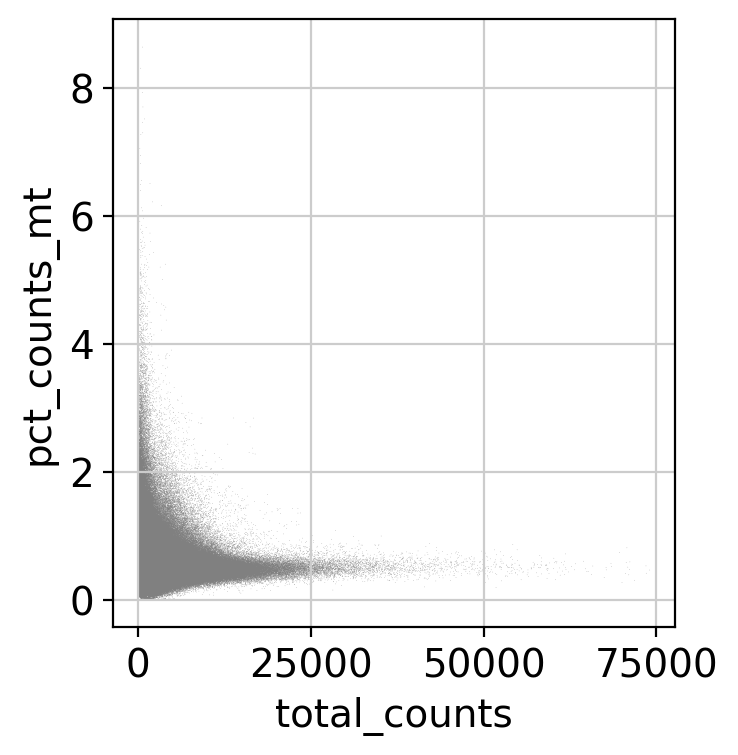

In [232]:
sc.settings.set_figure_params(dpi = 100, facecolor='white')
sc.pl.scatter(adata_filtered, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(adata_filtered, x="total_counts", y="pct_counts_mt")

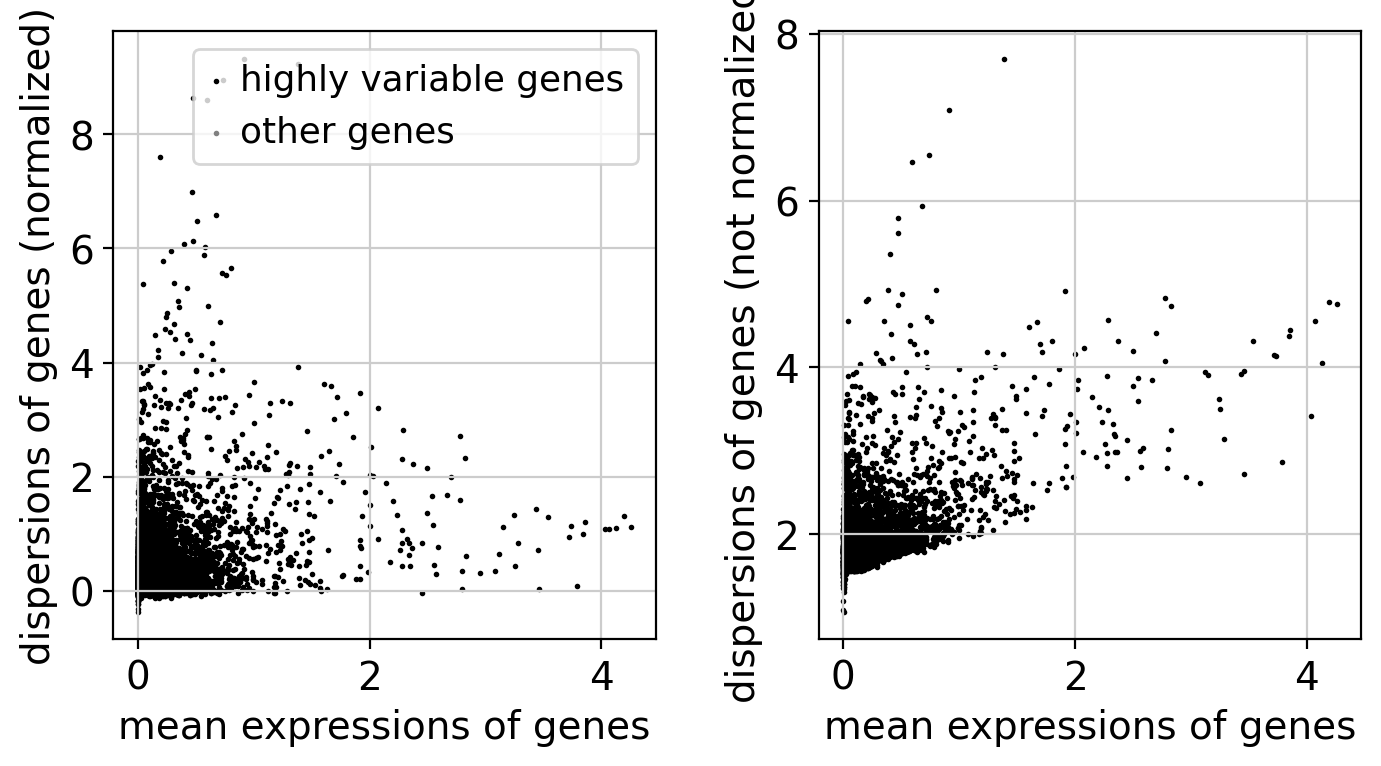

In [233]:
sc.pl.highly_variable_genes(adata_filtered)